# Python Machine Learning 5 - Unsupervised Learning
<p><a name="sections"></a></p>


## Sections

- <a href="#kmeans">K-means in Scikit Learn</a><br>
 - <a href="#kcase1">Case 1: Simple Test</a><br>
 - <a href="#kcase2">Case 2: Iris Data</a><br>
 - <a href="#kcase3">Case 3: Bank Card</a><br>
 - <a href="#kcase4">Case 4: Image Compression</a><br>
 - <a href="#swkmeans">Strengths and Weakness of K-means</a><br>
- <a href="#hier">Hierarchical Clustering</a><br>
 - <a href="#distance">Distance in Scikit Learn</a><br>
  - <a href="#manh">Manhattan Distance</a><br>
  - <a href="#euclidean">Euclidean Distance</a><br>
  - <a href="#cosine">Cosine Distance</a><br>
 - <a href="#hcase1">Case 1: Iris Data</a><br>
 - <a href="#hcase2">Case 2: Bank Card</a><br>

<p><a name="kmeans"></a></p>
## K-means in Scikit Learn
Import the class *KMeans* from the module *cluster* in the sklearn library.

In [1]:
from sklearn.cluster import KMeans
kmeans = KMeans()

**Arguments:**

- **n_clusters**: The number of clusters to divide, default is 8.
- **max_iter**: The maximal number of iterations, default is 300.
- **n_init**: Number of time the k-means algorithm will run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. default is 10.
- **random_state**: Optional. The generator used to initialize the centers. If an integer is given, it fixes the seed. Defaults to the global numpy random number generator.

Usually, we just need to set the argument **n_clusters** to determine how many groups are we going to split.

**Attributes:**

- **cluster\_centers\_**: The coordinates of cluster centers.

- **labels_**: Labels of each observation, which indicate the group number of each observation.

- **inertia_**: Sum of distances of samples to their closest cluster center.

The most import attribute here is the **labels_** .

**Methods:**

- **fit**: Fit k-means clustering on a given data set.
- **fit_predict**: Compute cluster centers and predict cluster index for each sample.
- **get_params**: Get parameters for this estimator.
- **set_params**: Set the parameters of this estimator.
- **predict**: Given a set of data, predict the closest cluster each sample belongs to.

<p><a name="kcase1"></a></p>
### Case 1: Simple Test
In this case we generate two sets of data separately, checking whether the K-means algorithm works.

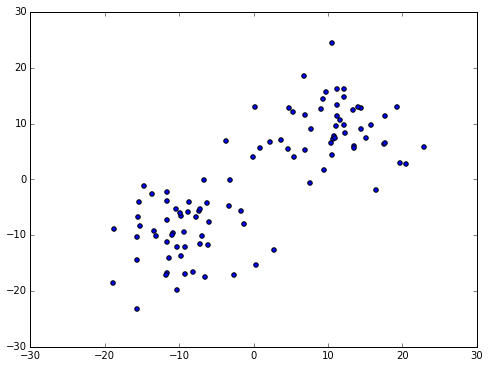

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
x1 = np.random.randn(50, 2) * 5 + 10 # draw 50 samples from N(10, 25)
x2 = np.random.randn(50, 2) * 5 - 10 # draw 50 samples from N(-10, 25)
x = np.row_stack([x1, x2])
plt.scatter(x[:, 0], x[:, 1])
plt.show()

- Set the parameter *n_clusters* to 2, and fit the model.

In [3]:
kmeans.set_params(n_clusters = 2)
kmeans.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

- The centroids of each cluster.

In [4]:
kmeans.cluster_centers_

array([[ 10.61518447,   9.13400376],
       [ -9.60842538,  -9.65506399]])

The real centroids are $(-10, -10)$ and $(10, 10)$. The estimations from the algorithm are very close to the real ones.

The labels of each observation.

In [5]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

The first 50 observations belong to cluster 1, and the last 50 observations belong to cluster 0. They align with the initial setting.

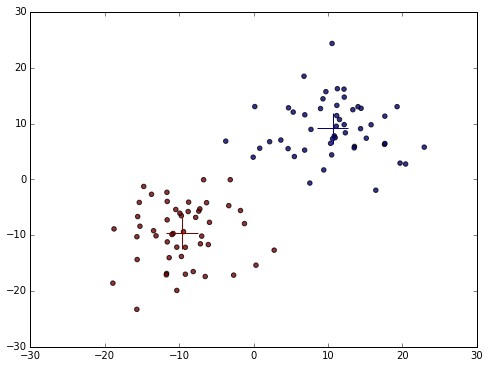

In [6]:
plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_, alpha = 0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '+', s = 1000, c = [0, 1])
plt.show()

<p><a name="kcase2"></a></p>
### Case 2: Iris Data

In this case, we try to split the iris data into multiple groups by using the features *sepal length*, *sepal width*, *petal length*, *petal width*.

- Set the argument *n_clusters* to 3.
- Fit the iris data.

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
kmeans.set_params(n_clusters=3)
kmeans.fit(iris.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

- The centroid of each cluster:

In [8]:
kmeans.cluster_centers_

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

- The label of each observation.

In [9]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Visualize the result by the last two features *petal length*, *petal width*.

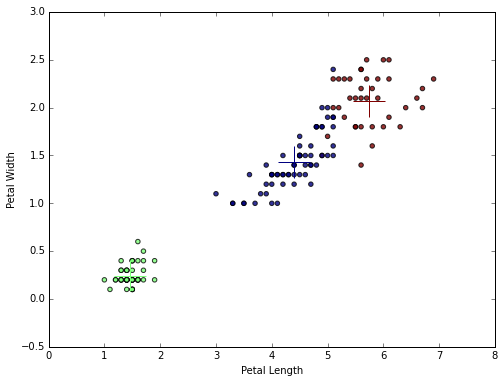

In [10]:
plt.scatter(iris.data[:, 2], iris.data[:, 3], c = kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker = "+", s = 1000, c = [0, 1, 2])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

The big markers "+" refers to the centroid of each cluster. 

We can also fit the principal components to the KMeans algorithm. Perform K means on the new dataset below, and then find the centers and the labels.

We can also fit the principal components to the KMeans algorithm. 
- First transform the data to principal components

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
iris.data2 = pca.set_params(n_components = 2).fit_transform(iris.data)

- Cluster the data by kmeans algorithm. Print the labels of the data.

In [12]:
#### Your code here
kmeans.fit(iris.data2)
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

- Visualize the result.

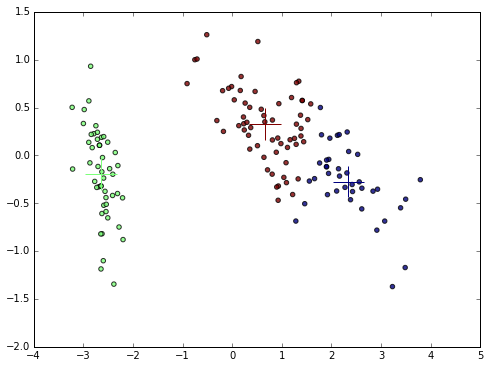

In [13]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(iris.data2[:, 0], iris.data2[:, 1], c = labels, alpha = 0.8)
plt.scatter(centers[:, 0], centers[:, 1], marker = '+', s = 1000, c = [0, 1, 2])
plt.show()

<p><a name="kcase3"></a></p>
### Case 3: Bank Card
This time we use the `card.csv` file which contains 300 observations and two features, *expensure* and *transfer*. And our goal is clustering these 300 customers. As we know that retailers and manufacturers usually group their consumers into multiple levels.

In [14]:
import pandas as pd
card = pd.read_csv('./data/card.csv')
card.head()

,expensure,transfer
0,2976,1863
1,2963,2048
2,2950,1940
3,2926,1737
4,2861,2227


In [15]:
expensure = np.array(card.iloc[:, 0])
transfer = np.array(card.iloc[:, 1])

Make a scatter plot to have a look at the data.

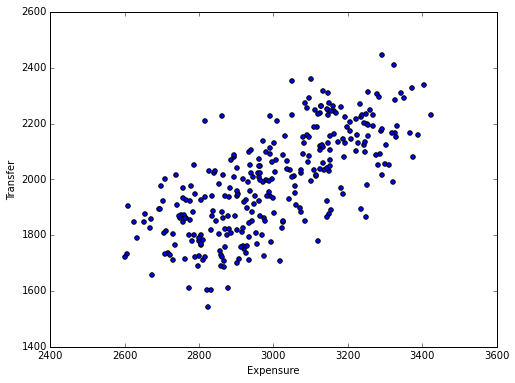

In [16]:
plt.scatter(expensure, transfer)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

There are no obvious boundaries to split this data set.

Group these consumers into three clusters.

In [17]:
kmeans.set_params(n_clusters=3)
kmeans.fit(card)
label = kmeans.labels_
label

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], d

The centroids of clusters.

In [18]:
center = kmeans.cluster_centers_
center

array([[ 3210.71875   ,  2194.38541667],
       [ 2807.24271845,  1803.68932039],
       [ 2999.72277228,  1992.48514851]])

Visualize the result.

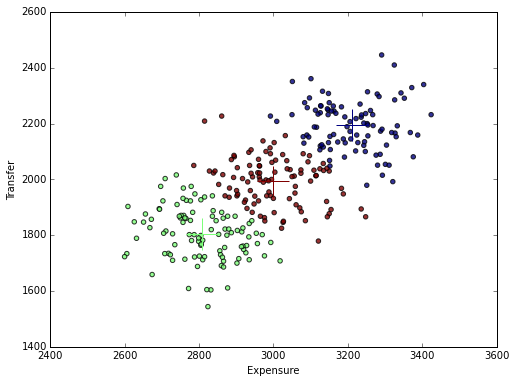

In [19]:
plt.scatter(expensure, transfer, c = label, alpha = 0.8)
plt.scatter(center[:, 0], center[:, 1], c = [0, 1, 2], marker = '+', s = 1000)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

- Consumers in the left lower cluster consume the least and transfer the least. The averages are 2807.24, 1803.69.
- Consumers in the right upper cluster consume the most and transfer the most. The averages are 3210.72, 2194.39.

Repeat what we did with now 2 clusters. Visualize the result.

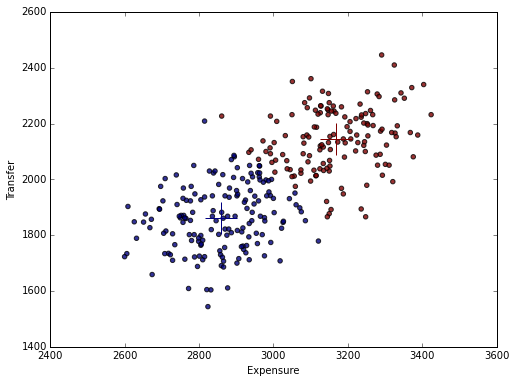

In [20]:
#### Your code here

kmeans.set_params(n_clusters=2)
kmeans.fit(card)
label = kmeans.labels_
center = kmeans.cluster_centers_

plt.scatter(expensure, transfer, c = label, alpha = 0.8)
plt.scatter(center[:, 0], center[:, 1], c = [0, 1], marker = '+', s = 1000)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

The centroids of the two groups:

In [21]:
center

array([[ 2858.9382716 ,  1861.88888889],
       [ 3168.10869565,  2145.33333333]])

- The second group consumes more and transfers more.
- Retailers and manufacturers can make different marketing strategies for different groups of customers.
- In practice, the pre-defined number $n\_clusters$ highly depends on the background knowledge.

<p><a name="kcase4"></a></p>
### Case 4: Image Compression

(-0.5, 592.5, 404.5, -0.5)

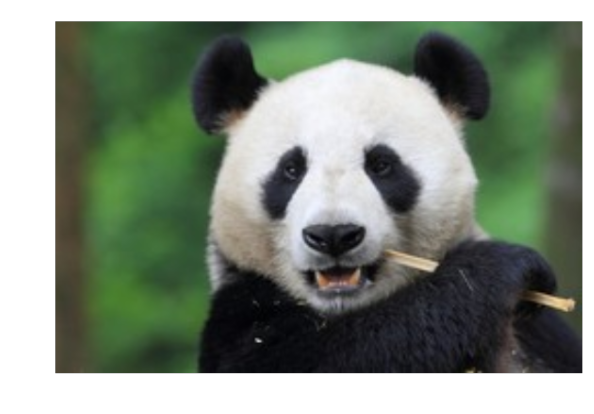

In [22]:
import matplotlib.image as mpimg
img = mpimg.imread('./pic/temp.png') 
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

In [23]:
# 3D array
# corresponging to red, blue, green
# all the number in dimension 1 and demension 2 ranges from 0 to 255
m1, m2, m3 = np.shape(img)
print m1, m2, m3

405 593 4


In [24]:
data_rs = img.reshape(np.size(img)/4, 4)
np.shape(data_rs)

(240165, 4)

#### Compress the Image into 128 Colors

In [25]:
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

def KmeansCompression(data, nclus=16):
    '''
    data: data to cluster
    nclus: number of colors
    '''
    cluster = KMeans(n_clusters = nclus, n_jobs=4)
    cluster.fit(data)
    centers = cluster.cluster_centers_
    labels = cluster.labels_
    return centers[labels]

In [26]:
img128 = KmeansCompression(data_rs, nclus = 128)

(-0.5, 592.5, 404.5, -0.5)

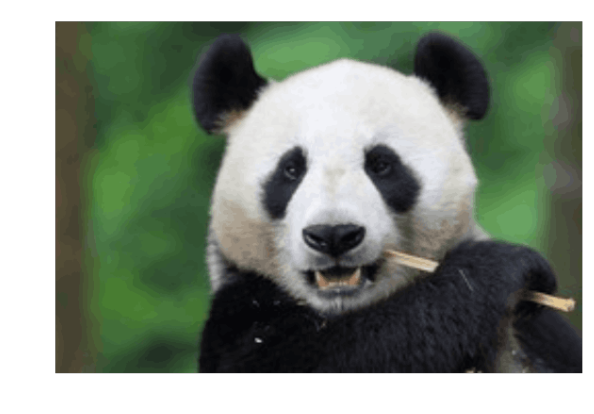

In [27]:
img128 = img128.reshape(m1, m2, m3)
plt.figure(figsize=(10,10))
plt.imshow(img128)
plt.axis('off')

#### Compress the Image into 64 Colors

(-0.5, 592.5, 404.5, -0.5)

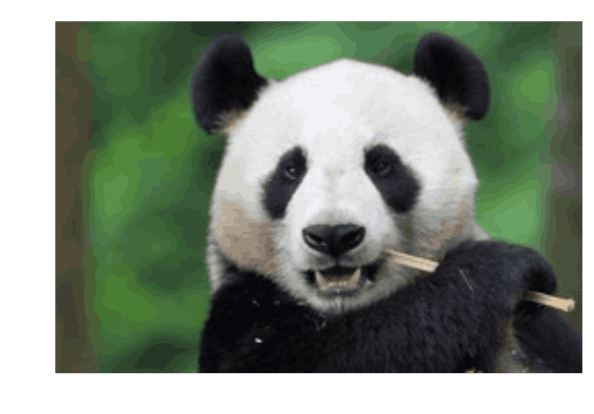

In [28]:
img64 = KmeansCompression(data_rs, nclus = 64)
img64 = img64.reshape(m1, m2, m3)
plt.figure(figsize=(10,10))
plt.imshow(img64)
plt.axis('off')

#### Compress the Image into 16 Colors

(-0.5, 592.5, 404.5, -0.5)

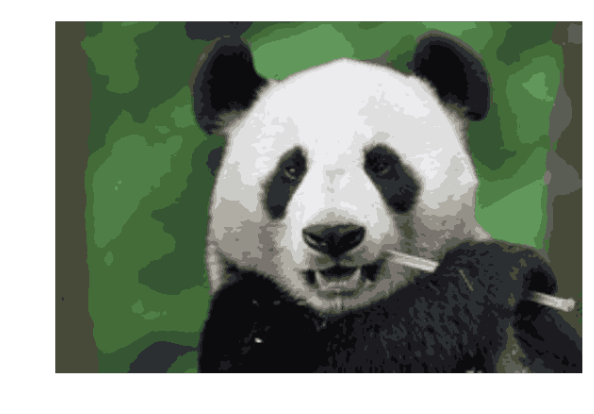

In [29]:
n = 16
img = KmeansCompression(data_rs, nclus = n)
img = img.reshape(m1, m2, m3)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

<p><a name="swkmeans"></a></p>
### Strengths and Weaknesses of K-means

- Strengths

    - Use simple principles for identifying clusters which can be explained in non-statistical terms.
    - It is fairly efficient and performs well at dividing the data into useful clusters.
    
- Weaknesses

    - It is less sophisticated than more recent clustering algorithms.
    - Because it uses initial random choice, it is not guaranteed to find the optimal set of clusters.
    - Require a reasonable guess for how many clusters naturally exist in the data.

<p><a name="hier"></a></p>
## Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

**Arguments:**

- **n_clusters**: The number of clusters to find. default=2 

- **affinity**: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”. If linkage is “ward”, only “euclidean” is accepted. default: “euclidean”

- **linkage**: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - *ward* minimizes the variance of the clusters being merged.
    - *average* uses the average of the distances of each observation of the two sets.
    - *complete* or maximum linkage uses the maximum distances between all observations of the two sets.

**Arguments:**

- The possible values of the **affinity** are “euclidean”, “l1”, “l2”, “manhattan”, “cosine”.

- "l1" is the same as "manhattan", while "l2" is the same as "euclidean".

- "cosine" here in python is not the same as we told previously.


The smaller the euclidean/manhattan distance is, the closer the two observations are.  The smaller the cosine is, the more far the observations are.

So in Python, the cosine distance is redefined as :
$$1 - \frac{\sum_{i=1}^{n} x_{1i} \times x_{2i}} {\sqrt{ \parallel x_1 \parallel ^2} \times \sqrt{ \parallel x_2 \parallel ^2}}$$

Now the cosine distance ranges from 0 to 2, and the smaller it is, the closer the observations are.

- 0: two vectors point to the same direction
- 1: perpendicular
- 2: opposite direction

<p><a name="distance"></a></p>
### Distance in Scikit Learn
We can compute the different distances by using the function **pairwise_distances**.

In [31]:
import numpy as np
a = np.array([[1, 2], [2, 1]])

<p><a name="manh"></a></p>
#### Manhattan Distance

In [32]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(a, metric='l1') 
# abs(1-2) + abs(2-1)  = 2

array([[ 0.,  2.],
       [ 2.,  0.]])

<p><a name="euclidean"></a></p>
#### Euclidean Distance

In [33]:
pairwise_distances(a, metric='l2') 
# ((1-2)**2 + (2-1) ** 2) ** 0.5 = 1.4142

array([[ 0.        ,  1.41421356],
       [ 1.41421356,  0.        ]])

<p><a name="cosine"></a></p>
#### Cosine Distance

In [34]:
pairwise_distances(a, metric='cosine') 
# 1 - (1*2 + 2*1)/(5**0.5 * 5**0.5) = 0.2

array([[  1.11022302e-16,   2.00000000e-01],
       [  2.00000000e-01,   1.11022302e-16]])

**Attributes:**

- **labels_**: Cluster labels for each observation.
- **n\_leaves\_**: Number of leaves in the hierarchical tree, which is also the number of observations.

**Methods:**

- **fit**: Fit the hierarchical clustering on the data.
- **get_params**: Get parameters for this estimator.
- **set_params**: Set the parameters of this estimator.

<p><a name="hcase1"></a></p>
### Case 1: Iris Data
Let's try to fit the hierarchical clustering model with the iris data.

In [35]:
from sklearn import datasets
iris= datasets.load_iris()
hier.set_params(n_clusters = 3)
hier.fit(iris.data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3, n_components=None,
            pooling_func=<function mean at 0x104115398>)

In [36]:
hier.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

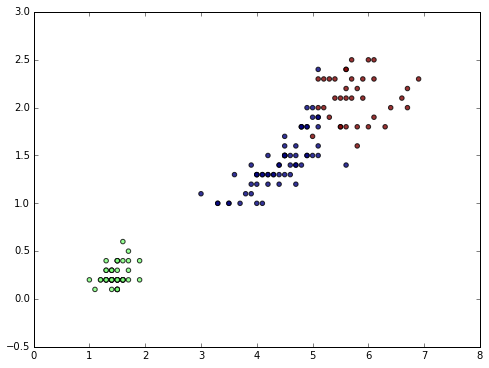

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(iris.data[:, 2], iris.data[:, 3], c = hier.labels_, alpha = 0.8)
plt.show()

The result is similar to the result of the K-means algorithm. The dendrogram corresponding to it can be sketched as below

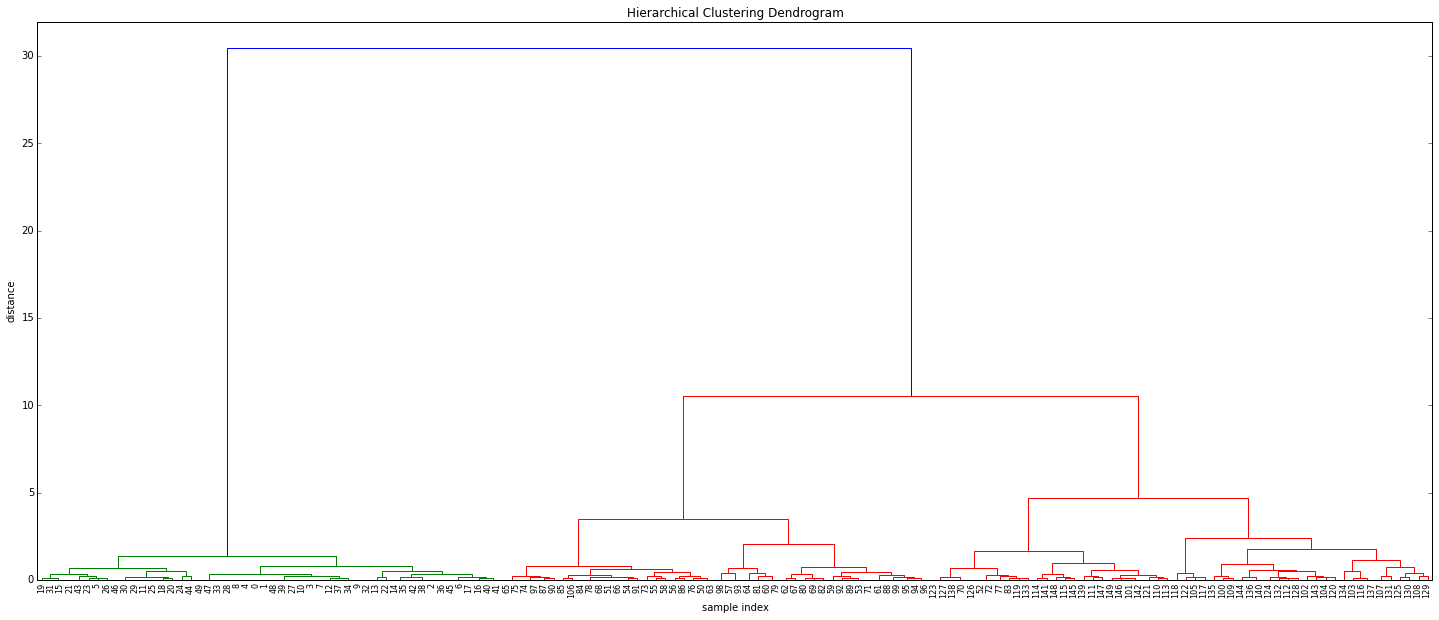

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
X = zip(iris.data[:, 2], iris.data[:, 3]) # We took only the last 
                                          # two columns into account

Z = linkage(X, 'ward')                    # This is the function clustering

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

# The function "dendrogram" plot for the cluster Z.
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

<p><a name="hcase2"></a></p>
### Case 2: Bank Card
Fit the hierarchical algorithm.

In [40]:
import pandas as pd
card = pd.read_csv('./data/card.csv')
hier.fit(card)
label = hier.labels_

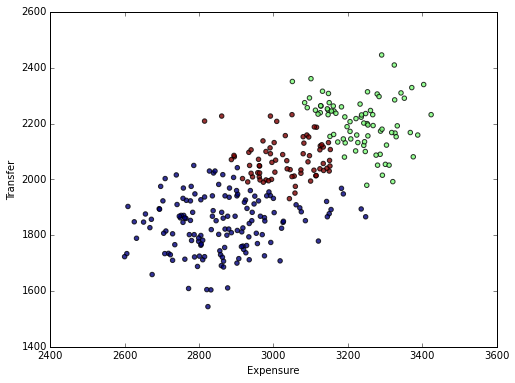

In [41]:
plt.scatter(card['expensure'], card['transfer'], c = label, alpha = 0.8)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

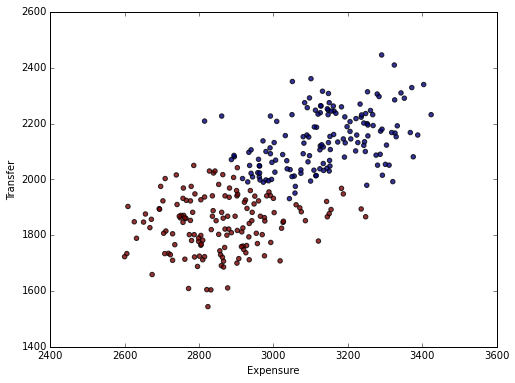

In [42]:
hier.set_params(n_clusters = 2)
hier.fit(card)
label = hier.labels_
plt.scatter(card['expensure'], card['transfer'], c = label, alpha = 0.8)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

Perform hierarchical clustering with cosine distance. What do you expect visualization would be. **Remark**: To use cosine distance, we cannot use Ward linkage anymore. Use the complete linkage instead.

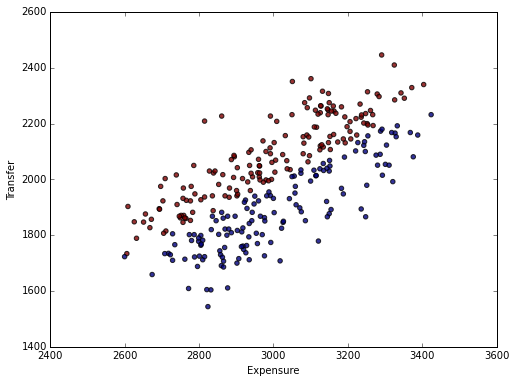

In [43]:
#### Your code here

hier.set_params(n_clusters = 2, affinity='cosine', linkage='complete')
hier.fit(card)
label = hier.labels_
plt.scatter(card['expensure'], card['transfer'], c = label, alpha = 0.8)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()